# FORECAST AND PREDICTION PROJECT DESCRIPTION


The gym chain Model Fitness is developing a customer interaction strategy based on analytical data.
One of the most common problems for gyms and other services face is customer churn. We can calculate churn based on people who get rid of their accounts or don't renew their contracts. For a gym, it makes sense to say a customer has left if they don't come for a month. In order to fight churn. Our task is to analyze customer profiles and define a customer retention strategy.
Our goals:
1. Learn to predict the probability of churn (for the upcoming month) for each customer
2. Draw up typical user portraits: select the most outstanding groups and describe their main features
3. Analyze the factors that impact churn most
4. Draw basic conclusions and develop recommendations on how to improve customer service:
5. Identify target groups
6. Suggest measures to cut churn
7. Describe all patterns of interaction with customers



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.cluster import KMeans

# Step 1. Download the data

We have CSV files containing data on churn for a given month and information on the month preceding it. 


In [2]:

df=pd.read_csv('/datasets/gym_churn_us.csv')
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


The dataset includes the following fields:

- 'gender'


- 'Near_Location' — whether the user lives or works in the neighborhood where the gym is located


- 'Partner' — whether the user is an employee of a partner company (the gym has partner companies whose employees get discounts; in those cases the gym stores information on customers' employers)


- 'Promo_friends' — whether the user originally signed up through a "bring a friend" offer (they used a friend's promo code when paying for their first membership)


- 'Phone' — whether the user provided their phone number

- 'Contract_period' — 1 month, 3 months, 6 months, or 1 year


- 'Group_visits' — whether the user takes part in group sessions


- 'Age' -customer age

- 'Avg_additional_charges_total' — the total amount of money spent on other gym services: cafe, athletic goods, cosmetics, massages, etc.

- 'Month_to_end_contract' — the months remaining until the contract expires

- 'Lifetime' - customer lifetime in months since came first time


- 'Avg_class_frequency_total' — average frequency of visits per week over the customer's lifetime


 - 'Avg_class_frequency_current_month' — average frequency of visits per week over the preceding month
 
 - 'Churn'- 1 or 0 value, customer churned or not for the month in question.


# Step 2. Exploratory data analysis (EDA)
 




In [3]:
#Let's look for any missing features
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

As we see there is no missing values in 4000 rows and 14 columns of the dataframe.

In [4]:
df.head()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
df.tail()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0
3999,1,0,1,0,0,12,1,30,178.861814,12.0,1,1.101832,1.035270,0


In [6]:
# Checking for duplicates
print(df.duplicated().sum())


0


In [7]:
# Changing column names to lower case
df.columns = df.columns.str.lower()
df.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [8]:
# Let's study the mean values and standard deviation
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


gender
1    51.0%
0    49.0%
Name: gender, dtype: object
near_location
1    84.5%
0    15.5%
Name: near_location, dtype: object
partner
0    51.3%
1    48.7%
Name: partner, dtype: object
promo_friends
0    69.2%
1    30.9%
Name: promo_friends, dtype: object
phone
1    90.3%
0     9.7%
Name: phone, dtype: object
contract_period
1     55.2%
12    24.0%
6     20.8%
Name: contract_period, dtype: object


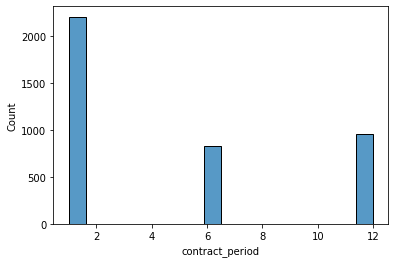

group_visits
0    58.8%
1    41.2%
Name: group_visits, dtype: object


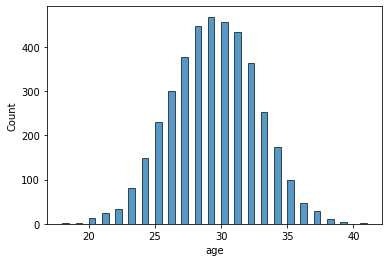

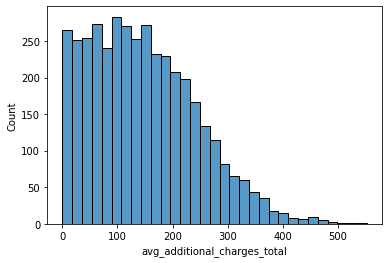

month_to_end_contract
1.0     55.2%
6.0     16.1%
12.0    13.1%
11.0     4.5%
5.0      3.2%
10.0     2.1%
9.0      1.8%
4.0      1.5%
8.0      0.9%
7.0      0.6%
3.0      0.6%
2.0      0.4%
Name: month_to_end_contract, dtype: object


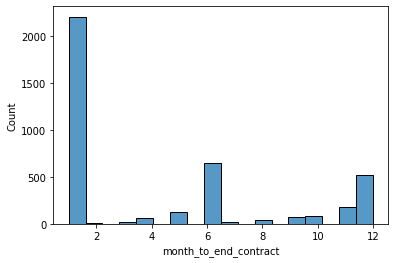

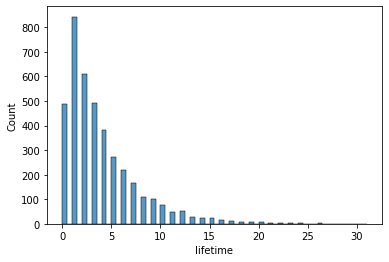

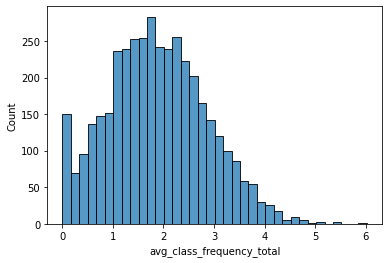

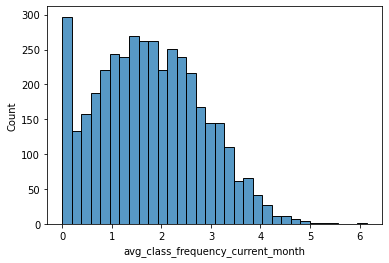

churn
0    73.5%
1    26.5%
Name: churn, dtype: object


In [9]:
#Let's make a function for distribution of the features 
def distribution(data):
    for col in data.columns:
        if (col == 'gender' or 
            col =='near_location' or 
            col == 'partner' or
            col == 'promo_friends' or 
            col == 'phone' or 
            col == 'group_visits' or 
            col =='churn'):
            print(col)
            print((data[col].value_counts() / len(data)).map("{:.1%}".format))
        elif col == 'contract_period' or col == 'month_to_end_contract':
                print(col)
                print((data[col].value_counts() / len(data)).map("{:.1%}".format))
                sns.histplot(data[col])
                plt.show()          
        else: 
            sns.histplot(data[col])
            plt.show()

#apply
distribution(df)

The portrait of our customer: 
- there is no differece by gender;
- the most of them live in the neighbourhood; 
- a half of them are the employees of a partner company;
- a third part signed up by friends recommendation;
- almost all of them leave their telephone number;
- mean Contract_period is about 4.6 months and 75% of them signed up at last 6 month;
- 40% of users take part in group sessions;
- mean customer's age is 29 years and standard deviation is about 3 years;
- client spends on gym services 147 USD in average;
- remains 4 month in average until the contract expires;
- 3.7 months passed since customer came for the first time;
- average frequency of visits per week over the customers is about 1.9 visits;
- over the preceding month the average frequency of visits per week decrease to 1.75 visits;
- Churn rate for the month in question is 26%.




In [10]:
#Let's look at the mean feature values in two groups: for those who left (churn) and for those who stayed, using the groupby() method.
data_group = df.groupby('churn')['gender', 'near_location', 'partner', 'promo_friends', 'phone',
                                 'contract_period', 'group_visits', 'age', 'avg_additional_charges_total',
                                 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total',
                                 'avg_class_frequency_current_month'].mean().reset_index()
data_group.T

/tmp/ipykernel_44/1315467840.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_group = df.groupby('churn')['gender', 'near_location', 'partner', 'promo_friends', 'phone',


,0,1
churn,0.000000,1.000000
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899


Comparacing the means of the features we see that:
1. mean gender, age, near location and phone feature are the same for churned and stayed (non-churn) clients.

2. 53% of non churn customers are employees of a partnership company, and only 35% of those who churned. The share of those who signed up through a "bring a friend" program is larger than non churned customers.

3. Non churned customers have much longer contract_period and month_to_end_contract.

4. 46% of non churn customers use group_visits.

5. Non churned spend much money in avg_additional_charges_total(average check is 158 USD and Churned average is 115 USD).

6. avg_class_frequency_total and avg_class_frequency_total for the non-churned people is significantly bigger.


Distribution of churned:
gender
1    51.1%
0    48.9%
Name: gender, dtype: object
near_location
1    76.8%
0    23.2%
Name: near_location, dtype: object
partner
0    64.5%
1    35.5%
Name: partner, dtype: object
promo_friends
0    81.6%
1    18.4%
Name: promo_friends, dtype: object
phone
1    90.3%
0     9.7%
Name: phone, dtype: object
contract_period
1     88.0%
6      9.8%
12     2.2%
Name: contract_period, dtype: object


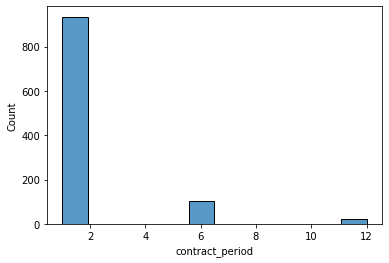

group_visits
0    73.1%
1    26.9%
Name: group_visits, dtype: object


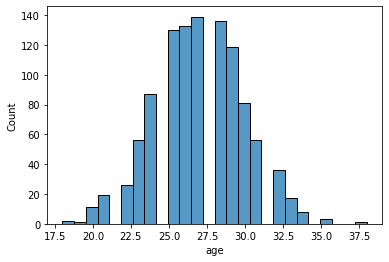

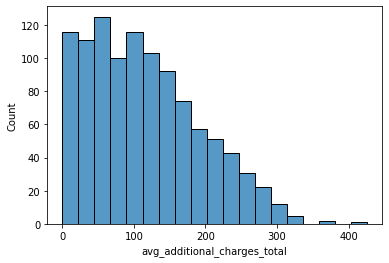

month_to_end_contract
1.0     88.0%
6.0      7.2%
5.0      1.8%
12.0     1.2%
4.0      0.7%
11.0     0.4%
10.0     0.2%
2.0      0.2%
9.0      0.1%
3.0      0.1%
8.0      0.1%
7.0      0.1%
Name: month_to_end_contract, dtype: object


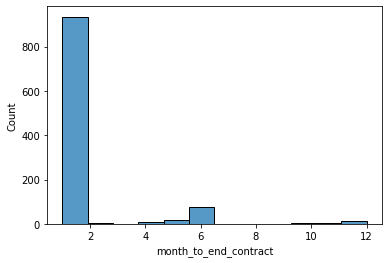

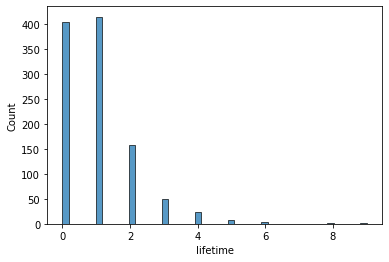

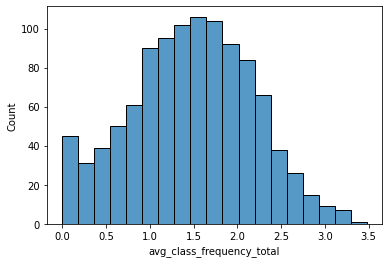

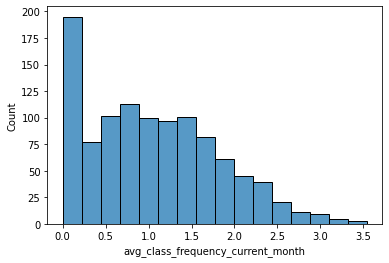

Distribution of non-churned:
gender
1    51.0%
0    49.0%
Name: gender, dtype: object
near_location
1    87.3%
0    12.7%
Name: near_location, dtype: object
partner
1    53.4%
0    46.6%
Name: partner, dtype: object
promo_friends
0    64.6%
1    35.4%
Name: promo_friends, dtype: object
phone
1    90.4%
0     9.6%
Name: phone, dtype: object
contract_period
1     43.3%
12    31.9%
6     24.8%
Name: contract_period, dtype: object


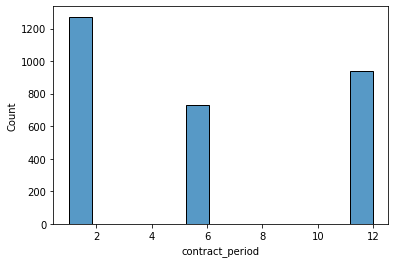

group_visits
0    53.6%
1    46.4%
Name: group_visits, dtype: object


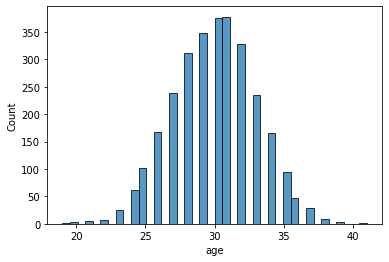

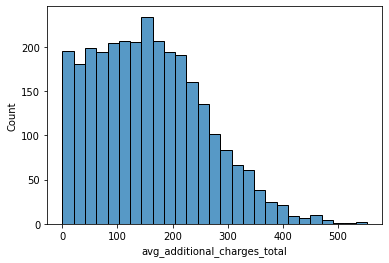

month_to_end_contract
1.0     43.3%
6.0     19.4%
12.0    17.4%
11.0     6.0%
5.0      3.8%
10.0     2.7%
9.0      2.4%
4.0      1.7%
8.0      1.3%
7.0      0.8%
3.0      0.7%
2.0      0.4%
Name: month_to_end_contract, dtype: object


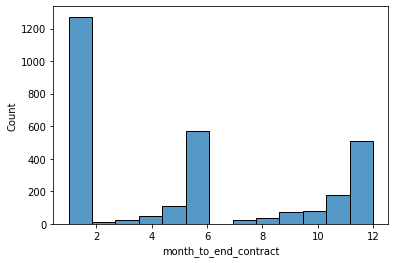

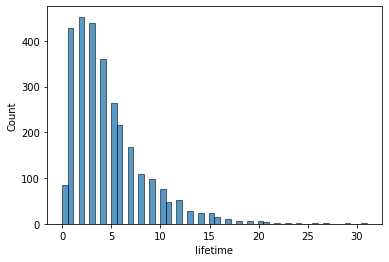

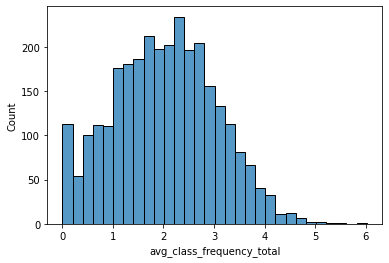

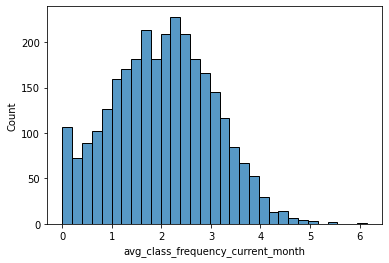

In [11]:
#let's divide data into 2 data frames. For churn and non churn people.
df_churn = df.query('churn == 1').drop('churn', axis=1)
df_nonchurn = df.query('churn == 0').drop('churn', axis=1)

#the distribution of churned people
print('Distribution of churned:')
distribution(df_churn)

#the distribution of  non-churned people
print('Distribution of non-churned:')
distribution(df_nonchurn)


Now we can clearly see on the charts which features have a significant impact on whether a customer stays loyal to the gym chain or leaves it. So we can build a correlation matrix and look for correlations between different features.

In [12]:
#Build a correlation matrix and display it
df.corr()


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


As a result we see 
 a strong correlation between avg_class_frequency_total and avg_class_frequency_current_month-0.95%,
 
 a strong correlation between contract period and month till the end of contract-0.97%. 
 
We need to drop one of the correlated feature in each pair for the purpose of building prediction model.

The following useless features also should be droped: gender and phone.

At list we have 9 features for the churning prediction model: 
#### near_location, 
#### partner, 
#### promo_friends,
#### contract_period,
#### group_visits, 
#### avg_additional_charges_total, 
#### lifetime, 
#### avg_class_frequency_current_month
#### age.


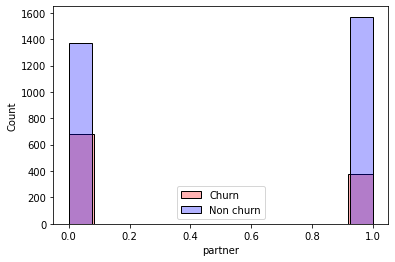

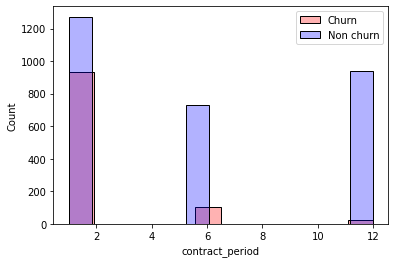

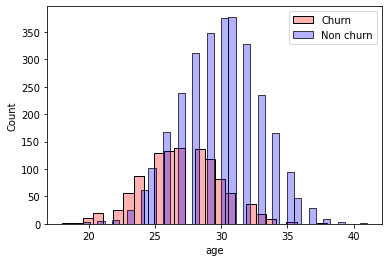

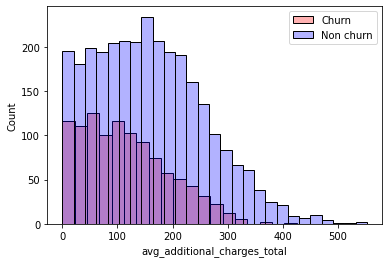

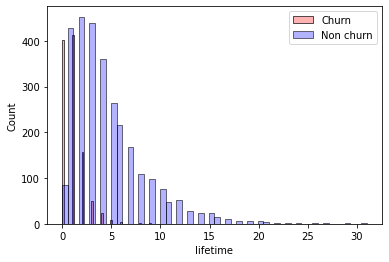

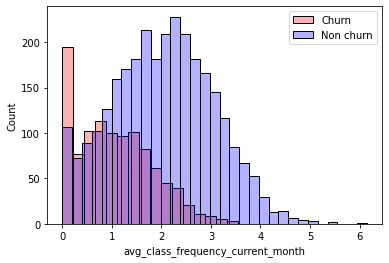

In [13]:
#Let's take a look on features histograms for churn and non-churn
for col in df_churn:
        if (col == 'contract_period' or 
            col =='age' or 
            col == 'avg_additional_charges_total' or
            col =='partner' or
            col == 'lifetime' or 
            col == 'avg_class_frequency_current_month'):  
            sns.histplot(df_churn[col], color = 'red', alpha = 0.3, label = 'Churn')
            sns.histplot(df_nonchurn[col], color = 'blue', alpha = 0.3, label = 'Non churn')
            plt.legend()
            plt.show()

# Step 3. Build a model to predict user churn

For build a model we should perform the following actions:

Build a binary classification model for customers where the target feature is the user's leaving next month.

Divide the data into train and validation sets using the train_test_split() function.

Train the model on the train set with two methods: logistic regression, random forest.

Evaluate accuracy, precision, recall,  for both models using the validation data. Use them to compare the models.

Define which model gave better results.

In [14]:
#Drop the columns which are not the features of the model
df_clean = df.drop(['gender', 'phone', 'month_to_end_contract', 'avg_class_frequency_total'], axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   near_location                      4000 non-null   int64  
 1   partner                            4000 non-null   int64  
 2   promo_friends                      4000 non-null   int64  
 3   contract_period                    4000 non-null   int64  
 4   group_visits                       4000 non-null   int64  
 5   age                                4000 non-null   int64  
 6   avg_additional_charges_total       4000 non-null   float64
 7   lifetime                           4000 non-null   int64  
 8   avg_class_frequency_current_month  4000 non-null   float64
 9   churn                              4000 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 312.6 KB


The dataframe of features is prepared for the prediction model.

In [15]:
#Divide the dataframe into features and target variable
X=df_clean.drop('churn', axis=1)
y=df_clean['churn']

#divide the dataframe into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#StandardScaler object to the train set
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

#apply standardization to the feature matrix for the test set
X_test_st = scaler.transform(X_test)

#list of models
models = [LogisticRegression(), RandomForestClassifier()]

#function that takes the model and data as input and outputs metrics
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy: {:.2f} Precision: {:.2f} Recall: {:.2f} F1: {:.2f} '.format(accuracy_score(y_test, y_pred), 
                                          precision_score(y_test, y_pred), recall_score(y_test, y_pred), 
                                          f1_score(y_test, y_pred)))

#loop of metrics
for i in models:
    print(i)
    make_prediction(i, X_train_st, y_train, X_test_st, y_test)

LogisticRegression()
Accuracy: 0.90 Precision: 0.79 Recall: 0.81 F1: 0.80 
RandomForestClassifier()
Accuracy: 0.90 Precision: 0.81 Recall: 0.77 F1: 0.79 


As a result we can compare the Logistic Regression and Random Forest Model metrics.

1. Accuracy 90% is equal for both models. 

2. Random Forest Model has better precision, only 19% of customers who are not churn the model determined them as churn. 

3. Logistic Regression has better Recall, there is only 19% of customers that are churn but the model determined them as non-churn. 

4. Logistic Regression model has better F1 -0.80 metric.

It's important that the model do not give the false negative predictions. Recall is more important metric for choosing the model, so the Logistic Regression model has better performance.

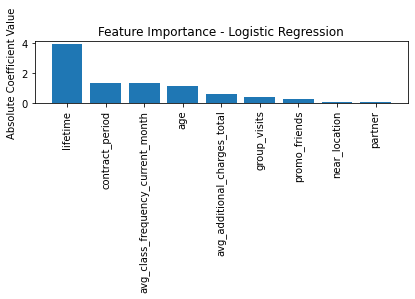

In [16]:
#feature names
feature_names = X.columns

#fitting the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_st, y_train)

#modulus of the coefficients for features
coefficients = logreg.coef_[0]
coefficients_abs = np.abs(coefficients) 

#Series with feature names and coefficients 
coefficients_series = pd.Series(coefficients_abs, index=feature_names)

coefficients_sorted = coefficients_series.sort_values(ascending=False)

#Bar Diagram
fig, ax = plt.subplots()
plt.bar(coefficients_sorted.index, coefficients_sorted)
ax.set_title("Feature Importance - Logistic Regression")
ax.set_ylabel("Absolute Coefficient Value")
ax.set_xticks(range(len(coefficients_sorted)))
ax.set_xticklabels(coefficients_sorted.index, rotation=90)
fig.tight_layout()
plt.show()

The most important factor is lifetime. It has much more importance to the churn than others in Logistic Regression model. 

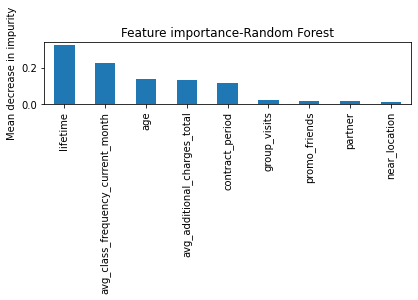

In [17]:
# fitting the model
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_st, y_train)

#Series with names and importance of the features
importances = forest.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)

#Bar Diagram
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importance-Random Forest")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xticklabels(forest_importances.index, rotation=90)
fig.tight_layout()
plt.show()

Random forest model shows lifetime as the most important feature. 
Visits frequency and age are on the second place as in Logistic Regression model.

Both models shows the same features as the most important factors of churn:

            1.life time, 2. frequency of visits, 3.age.

We can predict a customer's churn when we see decreasing his number of visits. Also, we should pay attention to our new customers, especially at the first month. We should pay attention in our marketing strategy to our young customers, as the risk of their churn is higher. 

# Step 4. Create user clusters
Now let's investigate our customers clusters through the following steps:

Standardize the data.

Build a matrix of distances based on the standardized feature matrix and plot a dendrogram.

Train the clustering model with the K-means algorithm and predict customer clusters.

Look at the mean feature values for clusters.

Plot distributions of features for the clusters.

Calculate the churn rate for each cluster.

In [18]:
# Standardize X (features)
X_sc = scaler.fit_transform(X)

In [19]:
#matrix of distances
linked = linkage(X_sc, method = 'ward')

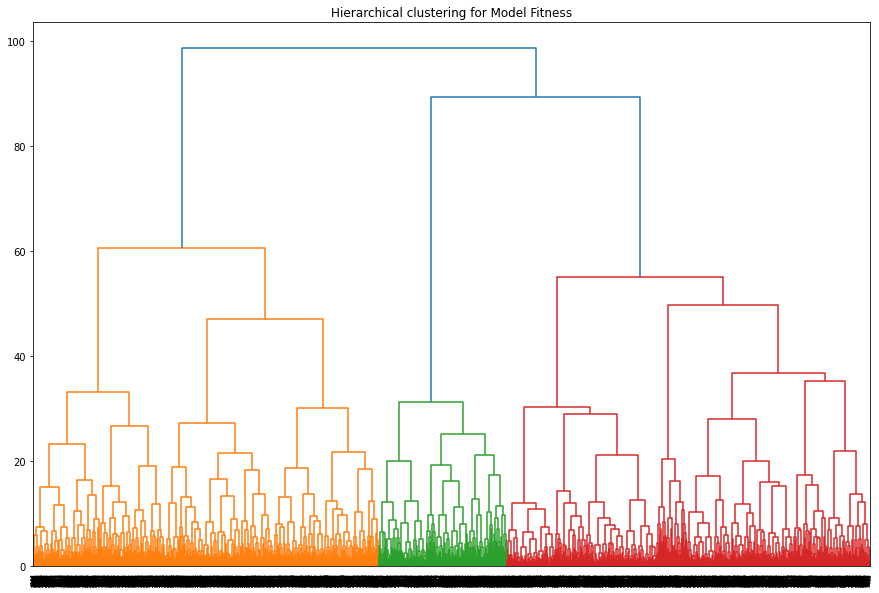

In [20]:
# Plotting a dendogram
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for Model Fitness')
plt.show()

In [21]:
# setting the number of clusters as 5
km = KMeans(n_clusters = 5)

# applying the algorithm to the data and forming a cluster vector
labels = km.fit_predict(X_sc)

# storing cluster labels in the field of our dataset
df_clean['cluster'] = labels

df_cluster = df_clean.groupby('cluster').mean()
df_cluster

,near_location,partner,promo_friends,contract_period,group_visits,age,avg_additional_charges_total,lifetime,avg_class_frequency_current_month,churn
cluster,,,,,,,,,,
0,1.000000,0.196755,0.068966,1.982759,0.000000,28.216024,134.331729,2.389452,1.418647,0.486815
1,1.000000,0.147887,0.098592,2.733803,1.000000,29.153521,139.895823,2.849296,1.669376,0.274648
2,0.993912,0.564688,0.021309,8.561644,0.409437,30.592085,172.969508,6.561644,2.351771,0.007610
3,0.000000,0.488525,0.073770,2.981967,0.229508,28.686885,137.348762,2.996721,1.596445,0.401639
4,0.995178,0.944069,1.000000,7.121504,0.511090,29.526519,152.916182,4.224687,1.895100,0.131148


We see that clusters 1 and 3 have very similar mean features. 

Distribution of the features for cluster 0
near_location
1    100.0%
Name: near_location, dtype: object
partner
0    80.3%
1    19.7%
Name: partner, dtype: object
promo_friends
0    93.1%
1     6.9%
Name: promo_friends, dtype: object
contract_period
1     83.3%
6     14.3%
12     2.4%
Name: contract_period, dtype: object


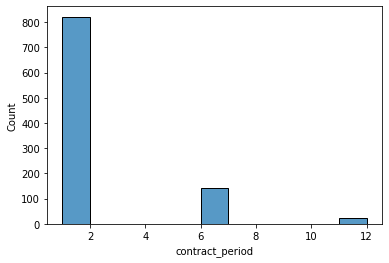

group_visits
0    100.0%
Name: group_visits, dtype: object


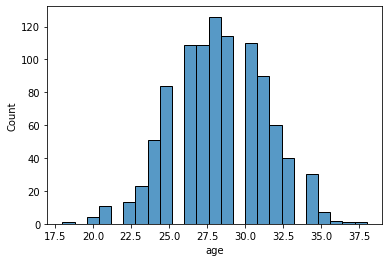

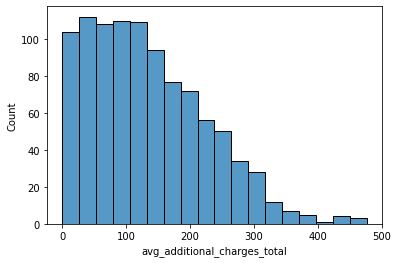

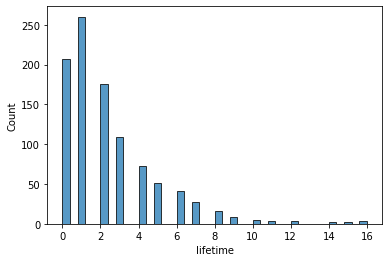

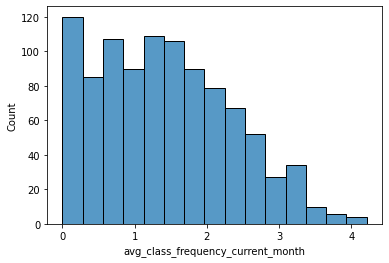

churn
0    51.3%
1    48.7%
Name: churn, dtype: object


In [22]:
#Creating tables for every cluster
df_0 = df_clean.query('cluster == 0').drop('cluster', axis=1)
df_1 = df_clean.query('cluster == 1').drop('cluster', axis=1)
df_2 = df_clean.query('cluster == 2').drop('cluster', axis=1)
df_3 = df_clean.query('cluster == 3').drop('cluster', axis=1)
df_4 = df_clean.query('cluster == 4').drop('cluster', axis=1)

#Building distributions for cluster 0
print('Distribution of the features for cluster 0')
distribution(df_0)

This cluster has 23% of churn customers. The majority of the customers have near_location, are employees of a partner company signed up through a "bring a friend" offer, have contract period for just for 1 month, and participate in group activities. We will compare age, visits frequency etc.


Distribution of the features for cluster 1
near_location
1    100.0%
Name: near_location, dtype: object
partner
0    85.2%
1    14.8%
Name: partner, dtype: object
promo_friends
0    90.1%
1     9.9%
Name: promo_friends, dtype: object
contract_period
1     72.3%
6     22.0%
12     5.8%
Name: contract_period, dtype: object


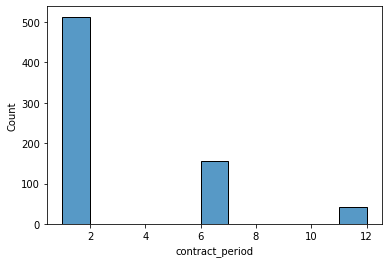

group_visits
1    100.0%
Name: group_visits, dtype: object


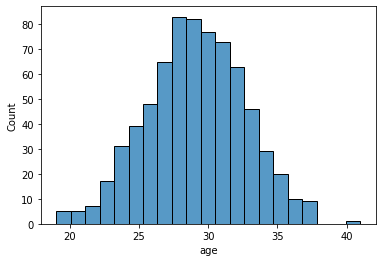

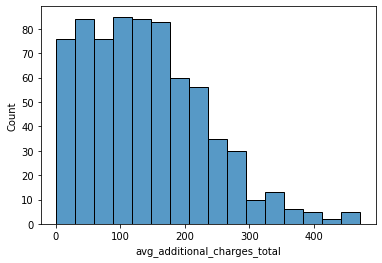

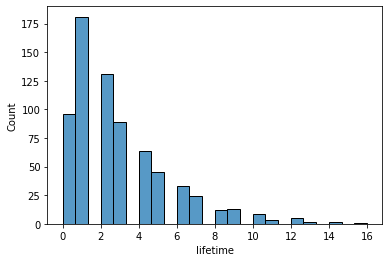

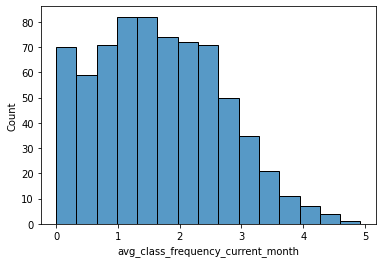

churn
0    72.5%
1    27.5%
Name: churn, dtype: object


In [24]:
#distribution for cluster 1
print('Distribution of the features for cluster 1')
distribution(df_1)

This cluster has 47% of churned customers.

We see that 'near location' is not the main factor because these clusters have different churn share. Models of churn predicton give the same conclusion.


Distribution of the features for cluster 1
near_location
1    99.4%
0     0.6%
Name: near_location, dtype: object
partner
1    56.5%
0    43.5%
Name: partner, dtype: object
promo_friends
0    97.9%
1     2.1%
Name: promo_friends, dtype: object
contract_period
12    58.3%
6     23.0%
1     18.7%
Name: contract_period, dtype: object


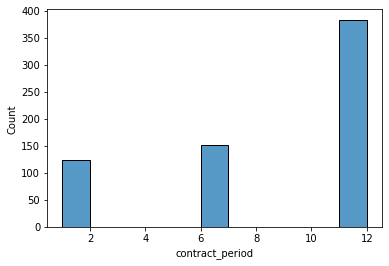

group_visits
0    59.1%
1    40.9%
Name: group_visits, dtype: object


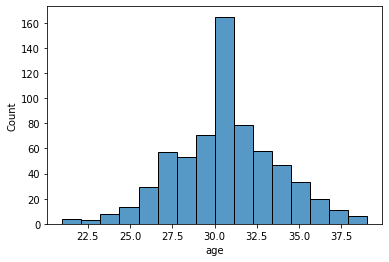

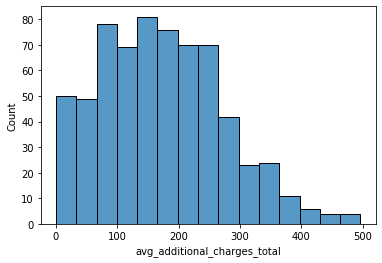

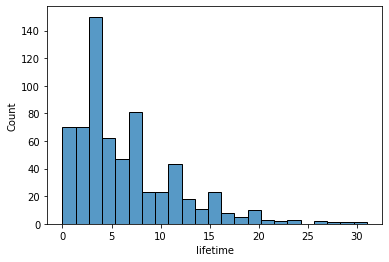

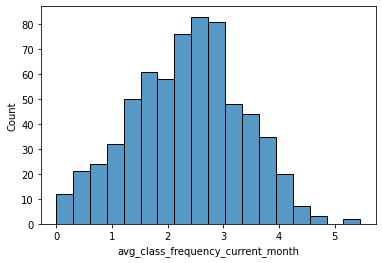

churn
0    99.2%
1     0.8%
Name: churn, dtype: object


In [25]:
#Let's look at the next cluster:
print('Distribution of the features for cluster 1')
distribution(df_2)

This cluster has 14% of churned customers. Here the majority of customers are living in near location, are employees of a partner company signed up through a "bring a friend" offer, have contract period for 6 or 12 months.
We can conclude, that the contract period have an influence to the churn rate. 

Distribution of the features for cluster 3
near_location
0    100.0%
Name: near_location, dtype: object
partner
0    51.1%
1    48.9%
Name: partner, dtype: object
promo_friends
0    92.6%
1     7.4%
Name: promo_friends, dtype: object
contract_period
1     72.0%
6     18.4%
12     9.7%
Name: contract_period, dtype: object


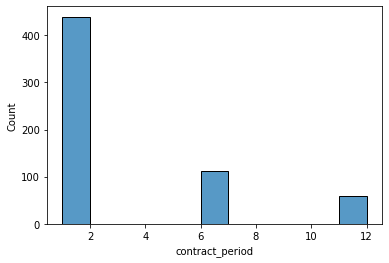

group_visits
0    77.0%
1    23.0%
Name: group_visits, dtype: object


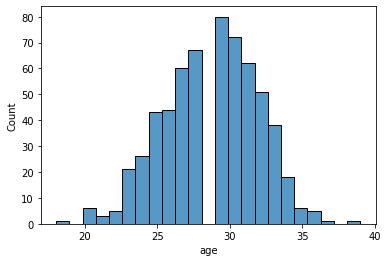

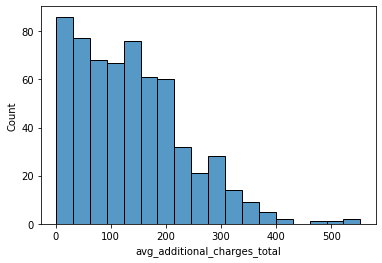

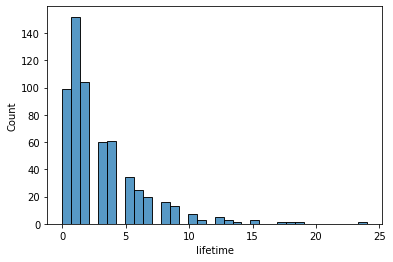

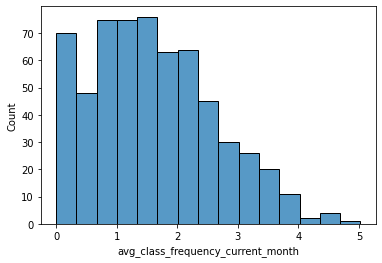

churn
0    59.8%
1    40.2%
Name: churn, dtype: object


In [26]:
#for cluster 3
print('Distribution of the features for cluster 3')
distribution(df_3)

This cluster is very similar to the cluster 1. 
It has 41% of churned customers. 100% of customers  live not in the near location, 49% are employees of a partner company. 7% of the customers here signed up through a "bring a friend" offer.

Contract_period:
1     72.0%
6     18.4%
12     9.7%, 

77% of the customers do not participate in group visits.

Distribution of the features for cluster 4
near_location
1    99.5%
0     0.5%
Name: near_location, dtype: object
partner
1    94.4%
0     5.6%
Name: partner, dtype: object
promo_friends
1    100.0%
Name: promo_friends, dtype: object
contract_period
12    43.7%
1     30.0%
6     26.3%
Name: contract_period, dtype: object


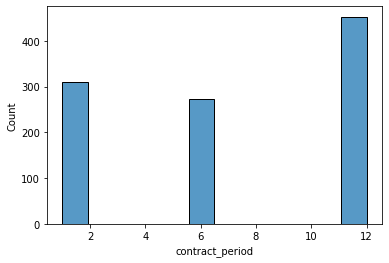

group_visits
1    51.1%
0    48.9%
Name: group_visits, dtype: object


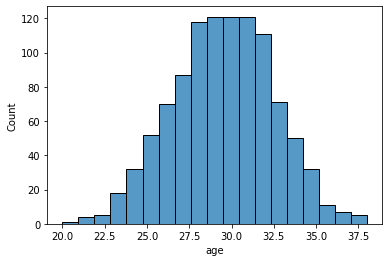

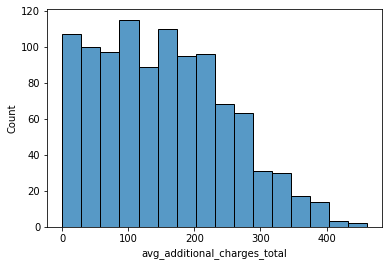

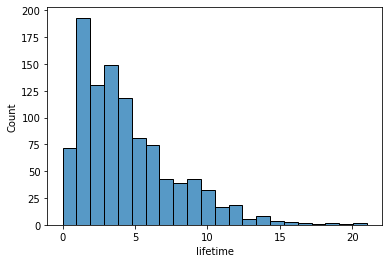

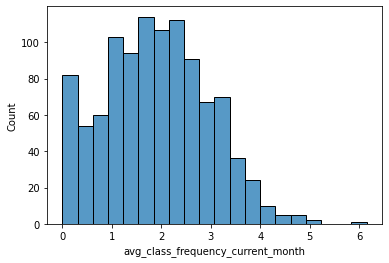

churn
0    86.9%
1    13.1%
Name: churn, dtype: object


In [27]:
#Building distributions for cluster 4
print('Distribution of the features for cluster 4')
distribution(df_4)

This cluster is very loyal and has the best churn rate.

The majority of customers live in near location,a half of customers are employees of a partner company and were not signed up through a "bring a friend" offer. Here the customers have the best contract period, so the main churn factor is contract period. 

Now let's compare the same features for different clusters  on one graph/

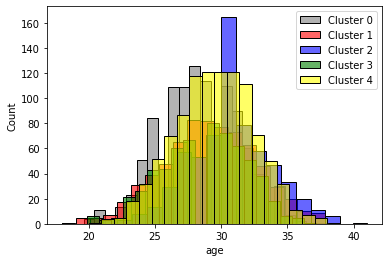

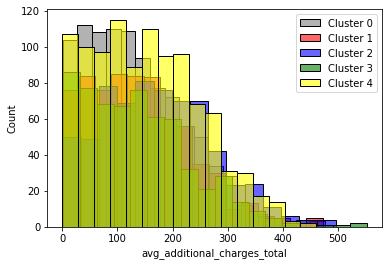

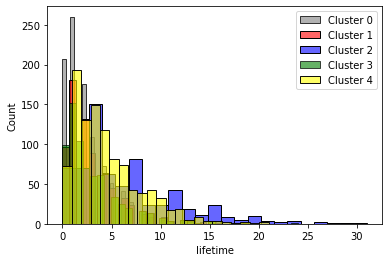

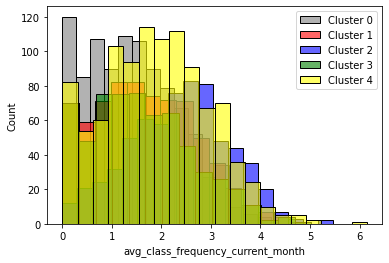

In [33]:
#histograms for different clusters
for col in df_0:
        if (col =='age' or 
            col == 'avg_additional_charges_total' or
            col == 'lifetime' or 
            col == 'avg_class_frequency_current_month'):  
            sns.histplot(df_0[col], color = 'gray', alpha = 0.6, label = 'Cluster 0')
            sns.histplot(df_1[col], color = 'red', alpha = 0.6, label = 'Cluster 1')
            sns.histplot(df_2[col], color = 'blue', alpha = 0.6, label = 'Cluster 2')
            sns.histplot(df_3[col], color = 'green', alpha = 0.6, label = 'Cluster 3')
            sns.histplot(df_4[col], color = 'yellow', alpha = 0.6, label = 'Cluster 4')
            plt.legend()
            plt.show()

1. As we see on the graphs age and additional charges have the same distributions among our clusters. 
2. Huge difference in life time graph. Churn depends on life time. 
3. Some difference in the visits frequency distribution. Churn depends on frequency current month.

So the main factors are:
Contract period, lifetime, promo_friends and frequency current month. Three factors are confirmed by churn prediction model. 

In [34]:
#churn rate for every cluster
cluster_churn = df_clean.groupby('cluster')['churn'].mean().reset_index()

cluster_churn.churn = cluster_churn.churn.apply(lambda x: "{:.1%}".format(x))
cluster_churn

,cluster,churn
0,0,48.7%
1,1,27.5%
2,2,0.8%
3,3,40.2%
4,4,13.1%


Cluster 2 has the best characteristics. 65% of customers have contract period for 6 or 12 month. Average lifetime is 9.2 months, 11% of the customers signed up through a "bring a friend" offer and average visits frequency is 2.4 times per week. This cluster has less than 1% churn rate and customers with such characteristics are very loyal.

So the main factors of churn are:

1. contract period, 

2. lifetime,

3. visits frequency.

# Conclusions and recommendations

Draw conclusions and formulate recommendations regarding .
You don't need to go into detail. Three or four essential principles and examples of their implementation in the form of specific marketing steps will do.

Learn to predict the probability of churn (for the upcoming month) for each customer
Draw up typical user portraits: select the most outstanding groups and describe their main features
Analyze the factors that impact churn most
Draw basic conclusions and develop recommendations on how to improve customer service:
Identify target groups
Suggest measures to cut churn
Describe any other patterns with respect to interaction with customers. 


We used describe method and then we wrote a function for visualization of the feature distribution. We built a correlation matrix also and looked for correlations between different features and churn as well as correlations between the features itself. We found out very strong correlation between total weekly visits and weekly visits for last month (0.95), so we left just one of them - visits for the last month, it shows possible churn better. Also we found out strong correlation between contract period and month till the end of contract (0.97). We also needed to drop one of them and we left just contract period for the purpose of building our churn prediction model. Finally we left 9 features for our churn prediction model: age, near_location, partner, promo_friends, contract_period, group_visits, avg_additional_charges_total, lifetime, avg_class_frequency_current_month



The purposes of the project was to define the strategy for customer interaction and retention of a gym chain Model Fitness. The given data for analysis contains 4000 rows in 14 columns. In the project we trained two different models, found out what features have more influence to the churn, built a matrix of distances based on the standardized feature matrix and plotted a dendrogram. We trained the clustering model with the K-means algorithm and predicted customer clusters. We calculated the churn rate for each cluster. we found out that main factors are contract period, lifetime and visits frequency. The most risk of churn have new customers.


We have a list of recommendations for improve the strategy for customer interaction and retention:

Enhance new customers interaction for convince them to sign a contract for 6 months, to visit the gym 2 times a week.
Prepare special promotions for customers at the end of the contract for 6 months, because retaining an existing customer is cheaper than acquiring the new one.
Pay attention to the customers who visit Model Fitness less than 2 times a week.
Inreact custumers that tend to decrease in number of visits.
Make a selection according to the client base of the customers less than 29 years old and send them a special young people promo, because they have a high churn risk.
